In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importar el csv inmuebles24_coordenas_simplificadas.csv
df = pd.read_csv('inmuebles24_coordenas_simplificadas.csv', encoding='utf-8')

In [3]:
df.head(3)

,precio,ubicacion,tamanio,latitud,longitud
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,19.361,-99.28
1,25000,"Avenida de la Paz 40, San Ángel, Alvaro Obregón",3820,19.347,-99.18
2,62000,"Avenida Baja California 295, Condesa, Cuauht...",56,19.406,-99.17


In [4]:
df['precio'] = df['precio'].astype(int)
df['tamanio'] = df['tamanio'].astype(int)

In [5]:
df.head(3)

,precio,ubicacion,tamanio,latitud,longitud
0,29900,"Jose Maria Castorena 232, El Yaqui, Cuajimal...",802,19.361,-99.28
1,25000,"Avenida de la Paz 40, San Ángel, Alvaro Obregón",3820,19.347,-99.18
2,62000,"Avenida Baja California 295, Condesa, Cuauht...",56,19.406,-99.17


In [6]:
len(df)

518

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   precio     518 non-null    int32  
 1   ubicacion  518 non-null    object 
 2   tamanio    518 non-null    int32  
 3   latitud    518 non-null    float64
 4   longitud   518 non-null    float64
dtypes: float64(2), int32(2), object(1)
memory usage: 16.3+ KB


In [8]:
df.describe()

,precio,tamanio,latitud,longitud
count,5.180000e+02,518.000000,518.000000,518.000000
mean,9.629594e+04,554.222008,19.390986,-99.165019
std,7.492632e+05,4099.424157,0.054083,0.051555
min,1.000000e+00,1.000000,19.203000,-99.560000
25%,1.076000e+04,27.000000,19.354500,-99.190000
50%,1.800000e+04,48.000000,19.402000,-99.165000
75%,3.200000e+04,78.000000,19.431000,-99.130000
max,1.000000e+07,65215.000000,19.520000,-98.980000


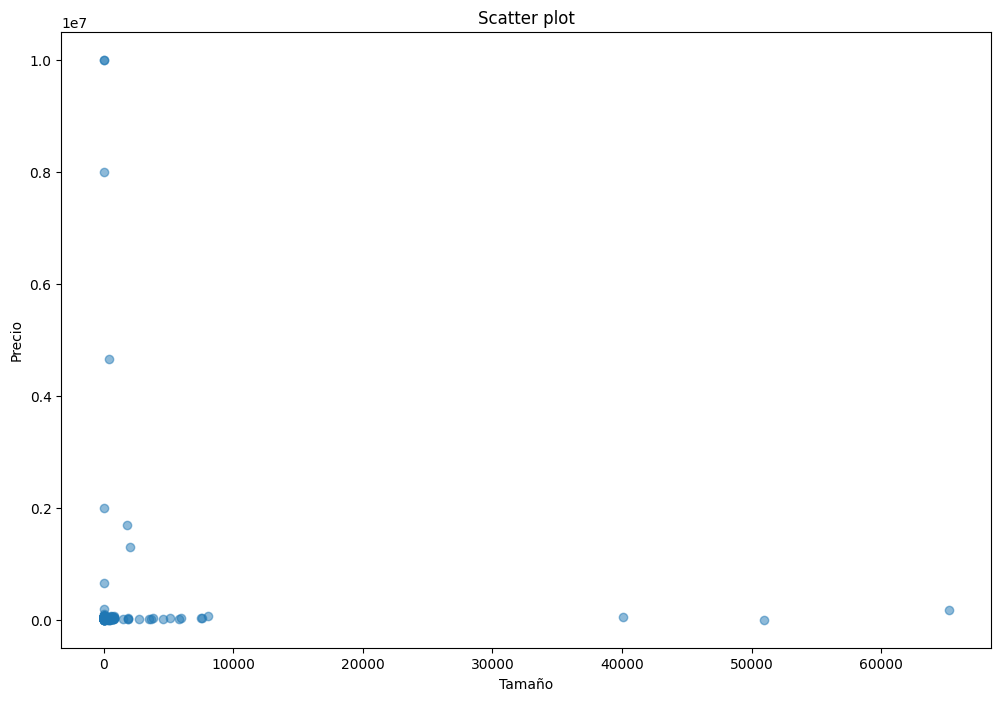

In [9]:
#mostrar los datos en un scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df['tamanio'], df['precio'], alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.show()

In [10]:
#eliminar los registros que esten en arriba de el 10% de los precios
df = df[df['precio'] < df['precio'].quantile(0.90)]
df = df[df['tamanio'] < df['tamanio'].quantile(0.90)]
len(df)


417

In [11]:
df

,precio,ubicacion,tamanio,latitud,longitud
3,8000,"BOLAÑOS, Felipe Pescador, Cuauhtémoc",30,19.454,-99.12
4,16000,"Huitzilopochtli Lte 14 Mz 19, Adolfo Ruiz Co...",35,19.320,-99.15
6,9000,"Lucerna 65, Juárez, Cuauhtémoc",8,19.430,-99.15
8,18000,"Montecito 38, Nápoles, Benito Juárez",40,19.394,-99.17
10,7500,"Petén, Narvarte Oriente, Benito Juárez",12,19.387,-99.15
...,...,...,...,...,...
513,9100,"Eje Central Lázaro Cárdenas 545, Narvarte Or...",26,19.396,-99.14
514,300,"Prolongacion Paseo de la Reforma 413, Santa ...",80,19.377,-99.25
515,26000,"Avenida San Jerónimo 630, Jardines del Pedre...",58,19.328,-99.21
516,10680,"Xotepingo, Ciudad Jardín, Coyoacán",12,19.328,-99.13


In [12]:
print(df)

     precio                                          ubicacion  tamanio  \
3      8000              BOLAÑOS,  Felipe Pescador, Cuauhtémoc       30   
4     16000   Huitzilopochtli Lte 14 Mz 19,  Adolfo Ruiz Co...       35   
6      9000                    Lucerna 65,  Juárez, Cuauhtémoc        8   
8     18000              Montecito 38,  Nápoles, Benito Juárez       40   
10     7500            Petén,  Narvarte Oriente, Benito Juárez       12   
..      ...                                                ...      ...   
513    9100   Eje Central Lázaro Cárdenas 545,  Narvarte Or...       26   
514     300   Prolongacion Paseo de la Reforma 413,  Santa ...       80   
515   26000   Avenida San Jerónimo 630,  Jardines del Pedre...       58   
516   10680                Xotepingo,  Ciudad Jardín, Coyoacán       12   
517   16400   Av. Portal de las Flores 1 ,65.60,  Central d...       65   

     latitud  longitud  
3     19.454    -99.12  
4     19.320    -99.15  
6     19.430    -99.15  

In [13]:
#exportar el csv inmuebles24Corregido.csv
df.to_csv('inmuebles24Corregido.csv', index=False, encoding='utf-8')

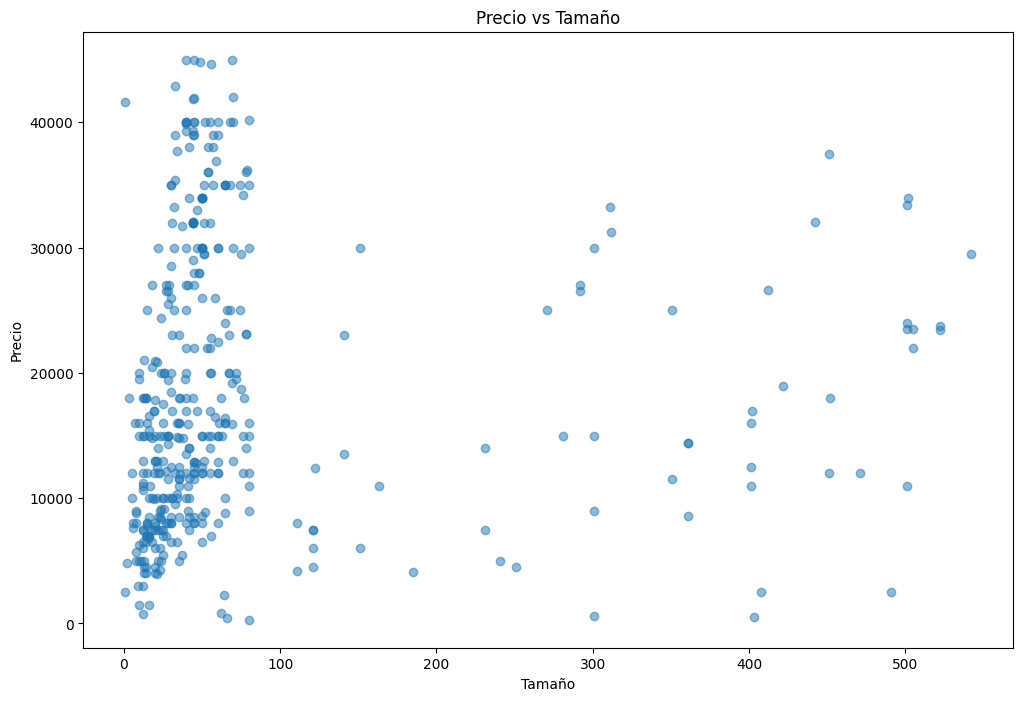

In [14]:
#mostrar los datos en un scatter plot
plt.figure(figsize=(12,8))
plt.scatter(df['tamanio'], df['precio'], alpha=0.5)
plt.title('Precio vs Tamaño')
plt.xlabel('Tamaño')
plt.ylabel('Precio')
plt.show()

In [15]:
#pip install folium

In [16]:
import folium

# Crear un mapa centrado en la primera ubicación
mapa = folium.Map(location=[19.361, -99.28], zoom_start=15)

# Añadir marcadores para cada ubicación
for index, row in df.iterrows():
    popup_text = f"Dirección: {row['ubicacion']}, Precio: {row['precio']} MXN, Tamaño: {row['tamanio']} m²"
    folium.Marker([row['latitud'], row['longitud']], popup=popup_text).add_to(mapa)

# Guardar el mapa como un archivo HTML
mapa.save("locales_en_renta.html")


------------------

In [17]:
df_super.head(3)


NameError: name 'df_super' is not defined

In [ ]:
#importar el csv datosSupermercados.csv
df_super = pd.read_csv('datosSupermercados.csv', encoding='utf-8')
#añadir los headers con los siguientes nombres tipo , producto , marca , categoria , precio , fecha , tienda , sucursal , direccion , estado , municipio , latitud , longitud
df_super.columns = ['Tipo', 'Producto', 'Marca', 'Categoría Secundaria', 'Categoría Principal', 'Precio', 'Fecha de Compra', 'Tienda', 'Tipo de Tienda', 'Sucursal', 'Ubicación de la Tienda', 'Estado', 'Ciudad', 'Latitud', 'Longitud']
df_super.head(3)


,Tipo,Producto,Marca,Categoría Secundaria,Categoría Principal,Precio,Fecha de Compra,Tienda,Tipo de Tienda,Sucursal,Ubicación de la Tienda,Estado,Ciudad,Latitud,Longitud
0,BARRA DE SONIDO,"SNH5. BLUETOOTH, USB. POTENCIA 600 W. SONIDO 4.1",LG,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,7799.0,16/06/2023,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL SAN MARCOS,"CONVENCION NTE. 2301, ESQ. FUNDICION, COL. SAN...",AGUASCALIENTES,AGUASCALIENTES,21.896204,-102.309694
1,BARRA DE SONIDO,"HW-A450. BLUETOOTH, USB. POTENCIA 300 W. SONID...",SAMSUNG,APARATOS ELECTRONICOS,ELECTRODOMESTICOS,3999.0,16/06/2023,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL SAN MARCOS,"CONVENCION NTE. 2301, ESQ. FUNDICION, COL. SAN...",AGUASCALIENTES,AGUASCALIENTES,21.896204,-102.309694
2,BATIDORAS,FPSTHM3532 O FPSTHM3532-013. MANUAL. 6 VELOCID...,OSTER,APARATOS ELECTRICOS,ELECTRODOMESTICOS,669.0,16/06/2023,COPPEL,TIENDA DE ELECTRODOMÉSTICOS,COPPEL SUCURSAL SAN MARCOS,"CONVENCION NTE. 2301, ESQ. FUNDICION, COL. SAN...",AGUASCALIENTES,AGUASCALIENTES,21.896204,-102.309694


In [ ]:
dfActual = df_super

In [ ]:
len(dfActual)

634570

In [ ]:
#Solo seleccionar el Estado con valor 'Ciudad de México' y la Categoria Secundaria con valor Basicos
dfActual = dfActual[dfActual['Estado'] == 'CIUDAD DE MÉXICO']

In [ ]:
len(dfActual)

143635

In [ ]:
dfActual.head(3)

,Tipo,Producto,Marca,Categoría Secundaria,Categoría Principal,Precio,Fecha de Compra,Tienda,Tipo de Tienda,Sucursal,Ubicación de la Tienda,Estado,Ciudad,Latitud,Longitud
58353,ACEITE,BOTELLA 1 LT. VEGETAL,01/02/2003,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,51.0,16/06/2023,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SANTA LUCIA,"SANTA LUCIA 185, ESQ. ROSA BLANCA, COL. ALFONS...",CIUDAD DE MÉXICO,ÁLVARO OBREGÓN,19.378523,-99.199154
58354,ACEITE,BOTELLA 845 ML. CANOLA,CAPULLO,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,72.0,16/06/2023,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SANTA LUCIA,"SANTA LUCIA 185, ESQ. ROSA BLANCA, COL. ALFONS...",CIUDAD DE MÉXICO,ÁLVARO OBREGÓN,19.378523,-99.199154
58355,ACEITE,BOTELLA 850 ML. VEGETAL,GRAN TRADICIÓN,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,38.0,16/06/2023,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA SUCURSAL SANTA LUCIA,"SANTA LUCIA 185, ESQ. ROSA BLANCA, COL. ALFONS...",CIUDAD DE MÉXICO,ÁLVARO OBREGÓN,19.378523,-99.199154


In [ ]:
#Agrupar las Sucursales y mostrar su latitud y longitud 
dfActual = dfActual.groupby(['Sucursal', 'Latitud', 'Longitud']).size().reset_index(name='counts')

In [ ]:
dfActual

,Sucursal,Latitud,Longitud,counts
0,7 ELEVEN,19.408894,-99.176846,221
1,7 ELEVEN SUCURSAL VICENTE SUAREZ,19.411336,-99.175054,145
2,ABASTECEDORA LUMEN SUCURSAL PLAZA AMERICA,19.313021,-99.135790,285
3,ABASTECEDORA LUMEN SUCURSAL ROMA,19.411172,-99.163478,395
4,ARIZMENDI,19.374751,-99.098064,1
...,...,...,...,...
212,WALMART SUCURSAL PORTAL CENTRO,19.419472,-99.130269,2085
213,WALMART SUCURSAL TEPEYAC,19.472750,-99.121635,2444
214,WALMART SUCURSAL TLALPAN,19.357925,-99.152347,648
215,WALMART SUCURSAL UNIVERSIDAD,19.368269,-99.164848,2151


In [ ]:
print(dfActual)

                                      Sucursal    Latitud   Longitud  counts
0                                     7 ELEVEN  19.408894 -99.176846     221
1             7 ELEVEN SUCURSAL VICENTE SUAREZ  19.411336 -99.175054     145
2    ABASTECEDORA LUMEN SUCURSAL PLAZA AMERICA  19.313021 -99.135790     285
3             ABASTECEDORA LUMEN SUCURSAL ROMA  19.411172 -99.163478     395
4                                    ARIZMENDI  19.374751 -99.098064       1
..                                         ...        ...        ...     ...
212             WALMART SUCURSAL PORTAL CENTRO  19.419472 -99.130269    2085
213                   WALMART SUCURSAL TEPEYAC  19.472750 -99.121635    2444
214                   WALMART SUCURSAL TLALPAN  19.357925 -99.152347     648
215               WALMART SUCURSAL UNIVERSIDAD  19.368269 -99.164848    2151
216               WALMART SUCURSAL VILLA COAPA  19.293833 -99.125379    2208

[217 rows x 4 columns]


In [ ]:
import folium
from folium.plugins import MarkerCluster

mapa = folium.Map(location=[19.408894, -99.176846], zoom_start=12)

for index, row in df.iterrows():
    popup_text = f"Precio: {row['precio']}, Tamaño: {row['tamanio']} m²"
    
    
    if row['precio'] > 1:
        color = 'green'
    else:
        color = 'red'
    
    folium.Marker(
        location=[row['latitud'], row['longitud']],
        popup=popup_text,
        icon=folium.Icon(color=color)
    ).add_to(mapa)
marker_cluster = MarkerCluster().add_to(mapa)

for index, row in dfActual.iterrows():
    popup_text = f"Sucursal: {row['Sucursal']}"
    folium.Marker(
        location=[row['Latitud'], row['Longitud']],
        popup=popup_text,
        icon=folium.Icon(color='blue')
    ).add_to(marker_cluster)

mapa.save("mapa_renta_tienda.html")

#listo ->
